# LSTM with Memory Between Batches

**Motivation** The LSTM network has memory, which is capable of remembering across long sequences. 

Nomally, the state within the network is reset after each training batch when fitting the model, as well as each call to **model.predict()** or **model.evaluate()**

We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer "stateful". This means that it can build state over the entrie training sequence and even maintain that state if needed to make predictions. 

It requires that the training data not be shuffled when fitting the network. It also requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to **model.reset_states()**. this means that we must create our own outer loop of epochs and within each spoch call **model.fit()** and **model.reset_states()**. 

In [1]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Using TensorFlow backend.


In [2]:
print('trainX shape', trainX.shape, 'trainY shape', trainY.shape)
for i in range(5):
    print(trainX[i], trainY[i])

trainX shape (92, 3) trainY shape (92,)
[ 0.01544401  0.02702703  0.05405405] 0.0482626
[ 0.02702703  0.05405405  0.04826255] 0.0328185
[ 0.05405405  0.04826255  0.03281853] 0.0598456
[ 0.04826255  0.03281853  0.05984557] 0.0849421
[ 0.03281853  0.05984557  0.08494207] 0.0849421


In [3]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [4]:
print('trainX shape', trainX.shape, 'trainY shape', trainY.shape)
for i in range(5):
    print(trainX[i], trainY[i])

trainX shape (92, 3, 1) trainY shape (92,)
[[ 0.01544401]
 [ 0.02702703]
 [ 0.05405405]] 0.0482626
[[ 0.02702703]
 [ 0.05405405]
 [ 0.04826255]] 0.0328185
[[ 0.05405405]
 [ 0.04826255]
 [ 0.03281853]] 0.0598456
[[ 0.04826255]
 [ 0.03281853]
 [ 0.05984557]] 0.0849421
[[ 0.03281853]
 [ 0.05984557]
 [ 0.08494207]] 0.0849421


Finally, when the LSTM layer is constructed, the stateful parameter must be set True and instead of specifying the input dimensions, we must hard code the number of samples in a batch, number of time steps in a sample and number of features in a time step by setting the batch_input_shape parameter. for example:

    model.add(LSTM(4, batch_input_shape=(batch_size, time_steps, features), stateful=True))
    
The same batch size must then be used later when evaluating the model and making predictions. For example:

    model.predict(trainX, batch_size=batch_size)

In [5]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (1, 4)                96          lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (1, 1)                5           lstm_1[0][0]                     
Total params: 101
Trainable params: 101
Non-trainable params: 0
____________________________________________________________________________________________________


In [6]:
for i in range(100):
	model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0085
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss:

Train Score: 27.27 RMSE
Test Score: 65.34 RMSE


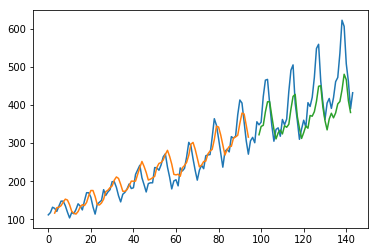

In [7]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

WE see the result are worse. The model may need more modules and may need to be trained for more epochs to internalize the structure of the problem. 

Mark. it seems the understanding of batch is different with another post, will have one ipynb to address the batch setup. 

Let's try more epochs, whether it helps.
Change it from 100 to 500

In [14]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(300):
	model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
0s - loss: 0.0100
Epoch 1/1
0s - loss: 0.0281
Epoch 1/1
0s - loss: 0.0167
Epoch 1/1
0s - loss: 0.0114
Epoch 1/1
0s - loss: 0.0080
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss:

In [15]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.50 RMSE
Test Score: 101.16 RMSE


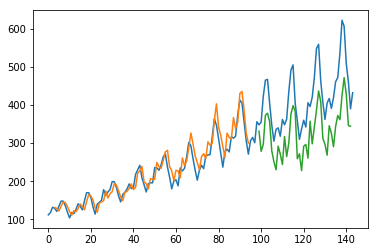

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

More epochs doesn't help!!!